## Problem: Delete Nodes And Return Forest
LeetCode: 1110

Given the root of a binary tree, each node in the tree has a distinct value.

After deleting all nodes with a value in to_delete, we are left with a forest (a disjoint union of trees).

Return the roots of the trees in the remaining forest. You may return the result in any order.

 

Example 1:

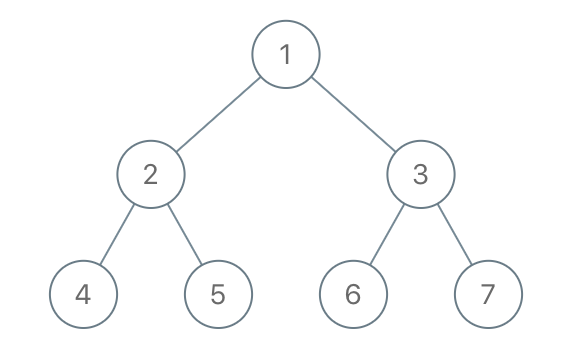

    Input: root = [1,2,3,4,5,6,7], to_delete = [3,5]
    Output: [[1,2,null,4],[6],[7]]
Example 2:

    Input: root = [1,2,4,null,3], to_delete = [3]
    Output: [[1,2,4]]
 

Constraints:

    The number of nodes in the given tree is at most 1000.
    Each node has a distinct value between 1 and 1000.
    to_delete.length <= 1000
    to_delete contains distinct values between 1 and 1000.

In [24]:
class TreeNode:
     def __init__(self, val=0, left=None, right=None):
         self.val = val
         self.left = left
         self.right = right

In [53]:
## Since we have to create a different trees, so need to have left and right subtree while looking for root.
## So, best approach is dfs.

def delNodes1(root, to_delete):
    result = []
    to_delete_set = set(to_delete)
    
    dfs(root, to_delete_set, result, True)
    return result

def dfs(root, to_delete_set, result, isRoot):
    if root is None:
        return None

    inDeletedList = root.val in to_delete_set
    if isRoot and not inDeletedList:
        result.append(root)
    root.left = dfs(root.left, to_delete_set, result, inDeletedList)
    root.right = dfs(root.right, to_delete_set, result, inDeletedList)
    return None if inDeletedList else root
        
        
        

In [54]:
def printTree(root):
    if not root:
        print("None")
    q = deque([root])
    while q:
        node = q.popleft()
        print(node.val)
        if node.left: q.append(node.left)
        if node.right: q.append(node.right)

In [55]:
root = TreeNode(1,TreeNode(2, TreeNode(4), TreeNode(5)),TreeNode(3, TreeNode(6), TreeNode(7)))
to_delete = [3,5]
result = delNodes1(root, to_delete)
for r in result:
    printTree(r)

1
2
4
6
7
